# C2 M1 Exp Recommender
**Course**: Course 2 (Master Class)
**Workflow**: `data-notebook-refiner`

---


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# 🔧 Setup & Imports
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd


## 1. 🔍 핵심 개념: 사용자 기반 협업 필터링 (User-Based CF)
> **아이디어**: "나와 취향이 비슷한 사람이 좋아한 건 나도 좋아할 것이다."

사용자 간의 평점 벡터 유사도를 **코사인 유사도(Cosine Similarity)**로 계산합니다.


In [2]:
# 더미 사용자-아이템 행렬 생성
data = {
    'User1': [5, 4, 0, 0, 1],
    'User2': [4, 5, 1, 0, 0],
    'User3': [0, 0, 5, 4, 5],
    'User4': [1, 0, 4, 5, 4]
}
df = pd.DataFrame(data, index=['IronMan', 'Hulk', 'Romance1', 'Romance2', 'Romance3']).T
print('User-Item Matrix:')
display(df)


User-Item Matrix:


,IronMan,Hulk,Romance1,Romance2,Romance3
User1,5,4,0,0,1
User2,4,5,1,0,0
User3,0,0,5,4,5
User4,1,0,4,5,4


## 2. 🧮 유사도 계산
사용자 간의 상관관계 행렬을 히트맵으로 확인합니다.


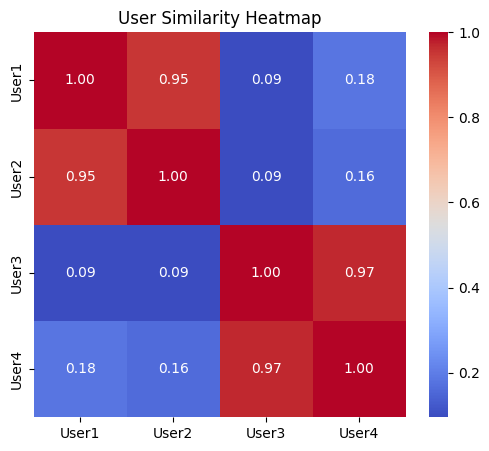

In [3]:
user_sim = cosine_similarity(df)
user_sim_df = pd.DataFrame(user_sim, index=df.index, columns=df.index)

plt.figure(figsize=(6, 5))
sns.heatmap(user_sim_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('User Similarity Heatmap')
plt.show()


## 3. 🎯 추천 수행
**User1**에게 추천할 아이템을 찾아봅시다.


In [4]:
target_user = 'User1'
similar_users = user_sim_df[target_user].sort_values(ascending=False)[1:] # 본인 제외
top_peer = similar_users.index[0]

print(f'{target_user}와 가장 비슷한 유저: {top_peer}')

# 유사한 유저는 봤지만, 타겟 유저는 안 본 영화 찾기
unseen_by_target = df.loc[target_user] == 0
peer_ratings = df.loc[top_peer]
recommendations = peer_ratings[unseen_by_target & (peer_ratings > 0)]

print('\n추천 아이템 목록:')
print(recommendations.sort_values(ascending=False))


User1와 가장 비슷한 유저: User2

추천 아이템 목록:
Romance1    1
Name: User2, dtype: int64



---
## 📝 핵심 요약 및 인사이트
*   **무엇을 배웠나요?**
    *   (여기에 핵심 배운 점을 기록하세요)
*   **다음 단계**:
    *   (다음 학습 단계)
